**MLB FREE AGENT MONEYBALL EFFECT**

Alex has a dataset, “baseballcase_data.csv,” covering MLB free agent batters from 1998 to 2013, with stats (e.g., AB, H, BB, OBP, SLG, WAR) and next-year salaries (inflation-adjusted).

**The task is to:**

Descriptive Analysis:
- Take some time to become familiar with the data.
- Understand how the data are structured and gain a basic understanding of the types of statistics contained in the data.
- Explore the data to reveal trends in stats and salaries,

Predictive Analysis:
- Build a model to predict salaries, assess key drivers, and identify undervalued/overvalued players in 2013.

*IMPORTING NECCESSARY LIBRARIES*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Silence some spurious seaborn warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Descriptive Analytics:**

In [9]:
# Load both CSVs
df = pd.read_csv('/content/baseballcase_data.csv')
df     # Change 'MyDrive' to the correct directory if necessary)

,Player,Year,Team,Pos,Age,G,PA,AB,R,H,...,SO_p,SV,TB_tm,WHIP,WP,cgSHO,tmSHO,Payroll,Attendance,Switch
0,Carlos Garcia,1998,ANA,2B,30,19,40,35,4,5,...,1091.0,52.0,2339.0,1.462,70.0,1.0,5.0,7.583155e+07,2555874.0,True
1,Dave Hollins,1998,ANA,3B,32,101,418,363,60,88,...,1091.0,52.0,2339.0,1.462,70.0,1.0,5.0,4.881250e+07,2454303.0,True
2,Randy Velarde,1998,ANA,2B,35,51,224,188,29,49,...,1091.0,52.0,2339.0,1.462,70.0,1.0,5.0,6.914788e+07,2519280.0,False
3,Gregg Jefferies,1998,"ANA, PHI",2B,30,144,592,555,72,167,...,1176.0,32.0,2218.0,1.381,73.0,3.0,10.0,2.749039e+07,1409391.0,True
4,Devon White,1998,ARI,CF,35,146,627,563,84,157,...,908.0,37.0,2157.0,1.363,52.0,2.0,6.0,8.975073e+07,3089222.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873,Jeff Baker,2013,TEX,UT,32,74,175,154,21,43,...,1309.0,46.0,2301.0,1.277,68.0,2.0,10.0,3.634190e+07,1586322.0,True
1874,Nelson Cruz,2013,TEX,RF,32,109,456,413,49,110,...,1309.0,46.0,2301.0,1.277,68.0,2.0,10.0,9.099333e+07,2357561.0,True
1875,Rajai Davis,2013,TOR,CF,32,108,360,331,49,86,...,1208.0,39.0,2274.0,1.344,54.0,2.0,11.0,1.484145e+08,3083397.0,True
1876,Ian Desmond,2013,WSN,SS,27,158,655,600,77,168,...,1236.0,47.0,2161.0,1.226,43.0,4.0,13.0,1.140568e+08,2652422.0,False


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df.shape

(1878, 274)

The dataset has 1873 records and 274 fields.

In [78]:
df.info

<bound method DataFrame.info of                Player  Year      Team Pos  Age    G   PA   AB   R    H  ...  \
0       Carlos Garcia  1998       ANA  2B   30   19   40   35   4    5  ...   
1        Dave Hollins  1998       ANA  3B   32  101  418  363  60   88  ...   
2       Randy Velarde  1998       ANA  2B   35   51  224  188  29   49  ...   
3     Gregg Jefferies  1998  ANA, PHI  2B   30  144  592  555  72  167  ...   
4         Devon White  1998       ARI  CF   35  146  627  563  84  157  ...   
...               ...   ...       ...  ..  ...  ...  ...  ...  ..  ...  ...   
1873       Jeff Baker  2013       TEX  UT   32   74  175  154  21   43  ...   
1874      Nelson Cruz  2013       TEX  RF   32  109  456  413  49  110  ...   
1875      Rajai Davis  2013       TOR  CF   32  108  360  331  49   86  ...   
1876      Ian Desmond  2013       WSN  SS   27  158  655  600  77  168  ...   
1877   Ryan Zimmerman  2013       WSN  3B   28  147  633  568  84  156  ...   

        SO_p    SV   TB_tm   WHIP    WP  cgSHO  tmSHO       Payroll  \
0     1091.0  52.0  2339.0  1.462  70.0    1.0    5.0  7.583155e+07   
1     1091.0  52.0  2339.0  1.462  70.0    1.0    5.0  4.881250e+07   
2     1091.0  52.0  2339.0  1.462  70.0    1.0    5.0  6.914788e+07   
3     1176.0  32.0  2218.0  1.381  73.0    3.0   10.0  2.749039e+07   
4      908.0  37.0  2157.0  1.363  52.0    2.0    6.0  8.975073e+07   
...      ...   ...     ...    ...   ...    ...    ...           ...   
1873  1309.0  46.0  2301.0  1.277  68.0    2.0   10.0  3.634190e+07   
1874  1309.0  46.0  2301.0  1.277  68.0    2.0   10.0  9.099333e+07   
1875  1208.0  39.0  2274.0  1.344  54.0    2.0   11.0  1.484145e+08   
1876  1236.0  47.0  2161.0  1.226  43.0    4.0   13.0  1.140568e+08   
1877  1236.0  47.0  2161.0  1.226  43.0    4.0   13.0  1.140568e+08   

      Attendance  Switch  
0      2555874.0    True  
1      2454303.0    True  
2      2519280.0   False  
3      1409391.0    True  
4      3089222.0    True  
...          ...     ...  
1873   1586322.0    True  
1874   2357561.0    True  
1875   3083397.0    True  
1876   2652422.0   False  
1877   2652422.0   False  

[1878 rows x 274 columns]>

In [12]:
df.isnull().sum()

,0
Player,0
Year,0
Team,0
Pos,0
Age,0
...,...
cgSHO,0
tmSHO,0
Payroll,0
Attendance,0


There are not missing values found in the dataset, means model is good to work for analysis

In [13]:
df.dtypes

,0
Player,object
Year,int64
Team,object
Pos,object
Age,int64
...,...
cgSHO,float64
tmSHO,float64
Payroll,float64
Attendance,float64


There are different types of variables present in the dataset incluing float, object, integer.

In [28]:
for col in df.columns:
  print(f"Column '{col}': {df[col].nunique()} unique values")

Column 'Player': 701 unique values
Column 'Year': 16 unique values
Column 'Team': 234 unique values
Column 'Pos': 13 unique values
Column 'Age': 27 unique values
Column 'G': 155 unique values
Column 'PA': 655 unique values
Column 'AB': 587 unique values
Column 'R': 130 unique values
Column 'H': 209 unique values
Column '2B': 55 unique values
Column '3B': 19 unique values
Column 'HR': 53 unique values
Column 'RBI': 141 unique values
Column 'SB': 60 unique values
Column 'CS': 20 unique values
Column 'BB': 117 unique values
Column 'SO': 178 unique values
Column 'BA': 1556 unique values
Column 'OBP': 1655 unique values
Column 'SLG': 1699 unique values
Column 'OPS': 1877 unique values
Column 'OPS+': 1878 unique values
Column 'TB': 348 unique values
Column 'GDP': 32 unique values
Column 'HBP': 26 unique values
Column 'SH': 21 unique values
Column 'SF': 16 unique values
Column 'IBB': 27 unique values
Column 'Rbat': 94 unique values
Column 'Rbaser': 19 unique values
Column 'Rdp': 12 unique val

The Above code shows the uniques values in all different coulmns

In [14]:
df.describe()

,Year,Age,G,PA,AB,R,H,2B,3B,HR,...,SO/BB,SO_p,SV,TB_tm,WHIP,WP,cgSHO,tmSHO,Payroll,Attendance
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,...,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1.878000e+03,1.878000e+03
mean,2005.421193,31.521832,111.121406,411.886581,366.264111,50.941427,98.928115,19.760383,1.878062,11.717252,...,2.103743,1097.013312,41.296060,2338.786475,1.375354,51.574547,2.347710,9.105431,9.352119e+07,2.549485e+06
std,4.481765,3.606409,36.871693,185.553888,164.557956,28.998517,49.711417,10.942777,2.342205,10.144582,...,0.386927,116.043450,7.222818,167.041312,0.093402,12.595613,1.744455,3.861558,3.797234e+07,6.952329e+05
min,1998.000000,20.000000,4.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.290000,764.000000,23.000000,1836.000000,1.166000,22.000000,0.000000,1.000000,1.188499e+07,6.427450e+05
25%,2002.000000,29.000000,87.000000,253.250000,225.000000,27.000000,57.000000,11.000000,0.000000,4.000000,...,1.820000,1009.000000,36.000000,2222.000000,1.302250,42.000000,1.000000,6.000000,6.700007e+07,2.024505e+06
50%,2005.000000,31.000000,118.000000,422.000000,376.500000,48.000000,98.000000,19.000000,1.000000,9.000000,...,2.100000,1088.000000,42.000000,2324.000000,1.367000,51.000000,2.000000,9.000000,8.864537e+07,2.567185e+06
75%,2009.000000,34.000000,142.000000,578.750000,513.000000,73.000000,139.000000,28.000000,3.000000,18.000000,...,2.340000,1172.750000,46.000000,2458.000000,1.442000,60.000000,3.000000,11.000000,1.105931e+08,3.094841e+06
max,2013.000000,46.000000,163.000000,754.000000,699.000000,143.000000,238.000000,55.000000,23.000000,54.000000,...,3.390000,1428.000000,66.000000,2832.000000,1.705000,96.000000,14.000000,23.000000,2.456846e+08,4.298655e+06


In [79]:
# Count missing values in each column
missing_values = df.isnull().sum()

# Sort by highest number of missing values
missing_values_sorted = missing_values.sort_values(ascending=False)

# Display only columns with at least 1 missing value
missing_values_filtered = missing_values_sorted[missing_values_sorted > 0]

# Display
missing_values_filtered

,0
SO/W,1878
Status,1718
Playoffs,1275
BA_po,584
SLG_po,584
OPS_po,584
OBP_po,583
IBB_po,583
HBP_po,572
Championships,572


In [16]:
# Define threshold for too many missing values
threshold = 500

# Find columns with more than 500 missing entries
cols_to_drop = df.columns[df.isnull().sum() > threshold]

# Drop those columns
df_cleaned = df.drop(columns=cols_to_drop)


In [17]:
# Print number of remaining columns
print("Remaining columns:", df_cleaned.shape[1])

# Show first 20 columns
df_cleaned.columns.tolist()[:30]


Remaining columns: 243


['Player',
 'Year',
 'Team',
 'Pos',
 'Age',
 'G',
 'PA',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'SB',
 'CS',
 'BB',
 'SO',
 'BA',
 'OBP',
 'SLG',
 'OPS',
 'OPS+',
 'TB',
 'GDP',
 'HBP',
 'SH',
 'SF',
 'IBB',
 'Rbat']

**What is the distribution of free agents’ negotiated salaries?**

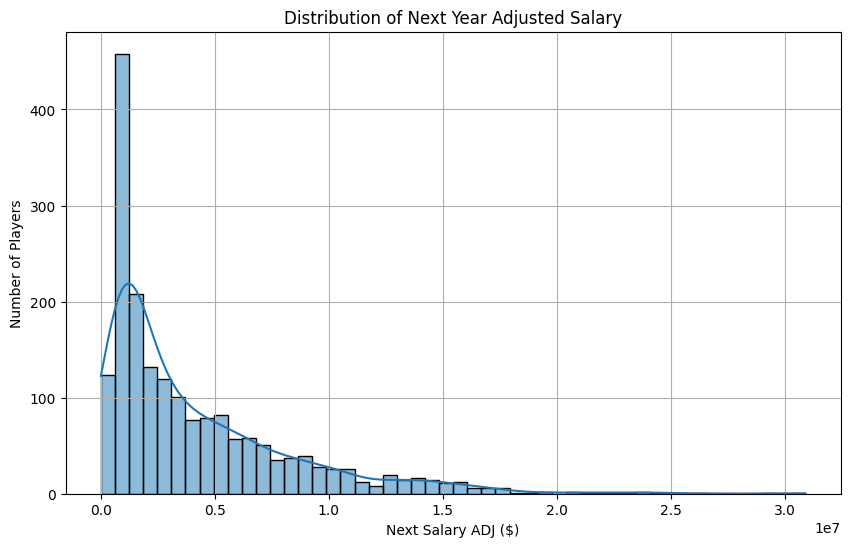

In [18]:

# 🧪 Subset for core analysis
df_analysis = df_cleaned[['Player', 'Year', 'HR', 'OBP', 'SLG', 'WAR', 'Next Salary ADJ']].dropna()

# 1️⃣ Distribution of salary
plt.figure(figsize=(10, 6))
sns.histplot(df_analysis['Next Salary ADJ'], bins=50, kde=True)
plt.title('Distribution of Next Year Adjusted Salary')
plt.xlabel('Next Salary ADJ ($)')
plt.ylabel('Number of Players')
plt.grid(True)
plt.show()

The distribution of Next Salary ADJ is right-skewed, as expected in real-world salary data. A few players earn extremely high salaries, creating a long tail.
A single linear model might not generalize well across all salary levels due to this skewness.
A log transformation helps normalize the data and makes model performance better.

**Are there any variable transformations that would be potentially useful to apply?**

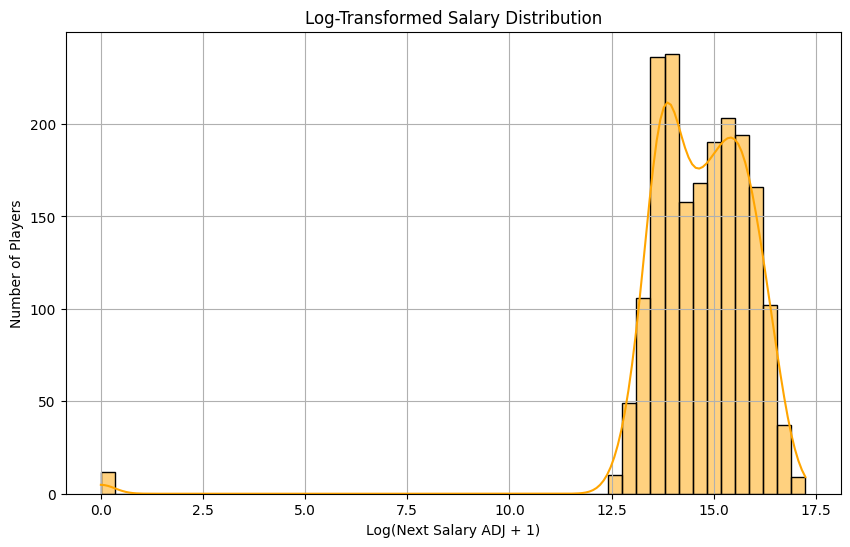

In [19]:
# 2️⃣ Log transformation to reduce skewness
df_analysis['Log_Salary'] = np.log1p(df_analysis['Next Salary ADJ'])
plt.figure(figsize=(10, 6))
sns.histplot(df_analysis['Log_Salary'], bins=50, kde=True, color='orange')
plt.title('Log-Transformed Salary Distribution')
plt.xlabel('Log(Next Salary ADJ + 1)')
plt.ylabel('Number of Players')
plt.grid(True)
plt.show()


Log Transformation (log(Next Salary ADJ + 1)) normalizes the distribution and is appropriate for modeling purposes.
There is a slight upward trend in salaries over the years. Some years show larger variance, possibly due to more high-value contracts.

**Salary Trends Over Time**

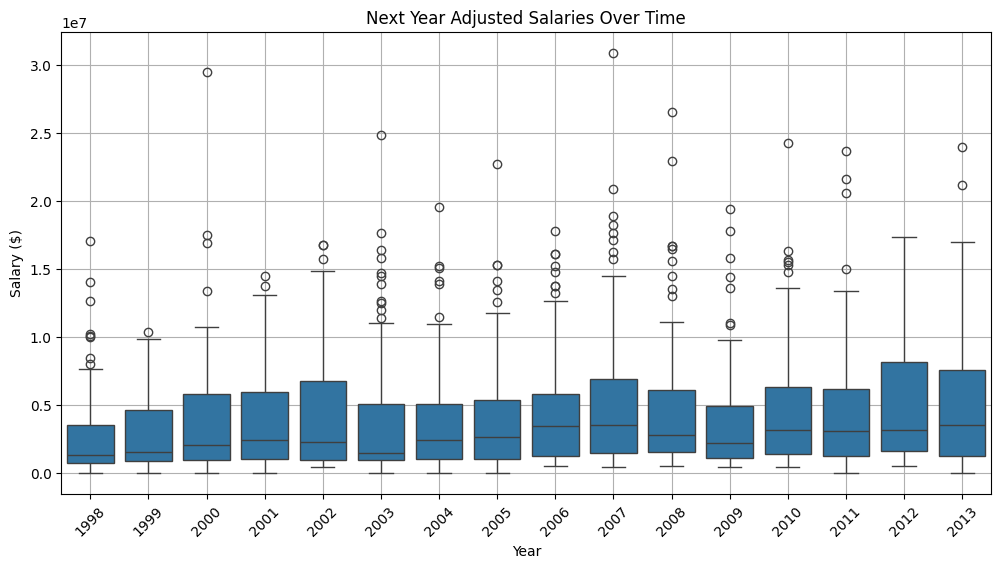

In [20]:
# 3️⃣ Salary trends over time
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Next Salary ADJ', data=df_analysis)
plt.xticks(rotation=45)
plt.title('Next Year Adjusted Salaries Over Time')
plt.ylabel('Salary ($)')
plt.xlabel('Year')
plt.grid(True)
plt.show()


**Salary Distribution Over Time:**

Each box represents the distribution of salaries for a given year.

The thick line inside the box is the median salary.
The top and bottom of the box show the interquartile range (IQR) – the 25th to 75th percentile.
The whiskers typically extend to 1.5 times the IQR, and points outside this range are outliers.

**Salary Growth:**

There's a slight upward trend in both median and upper salaries over the years, especially noticeable in 2012 and 2013, where the boxes and whiskers are taller.
Despite fluctuations, salaries appear to generally increase over time.

**Outliers and High Earners:**

Numerous outliers (circles above whiskers) indicate some individuals earn significantly more than the rest, with some reaching over $30 million.
The number of outliers is high across all years, suggesting a highly skewed distribution—likely due to top athletes or executives with exceptionally large salaries.

**Variability:*

Salary dispersion (height of boxes and whiskers) increased after the early 2000s, indicating greater salary inequality or a wider range of salaries.

**2008 Financial Crisis Impact:**

There’s a noticeable dip in 2009, likely reflecting economic downturn effects, before salaries start climbing again in the following years.

**What variable has the highest correlation with Next Year’s Salary? What are the key drivers behind large salaries?**

In [21]:
correlation_cols = ['Next Salary ADJ','HR', 'OBP', 'SLG', 'OPS', 'R', 'RBI', 'SO', 'BB', 'BA', 'PA', 'Rbat', 'WAR', 'AB', 'H', '2B', '3B', 'HBP', 'SF', 'SB', 'CS']
correlations = df_cleaned[correlation_cols].corr()
salary_corr = correlations['Next Salary ADJ'].sort_values(ascending=False)
print(salary_corr)

Next Salary ADJ    1.000000
RBI                0.607161
R                  0.588059
HR                 0.575679
H                  0.556634
BB                 0.547377
PA                 0.544667
WAR                0.537225
AB                 0.527659
Rbat               0.526415
2B                 0.521630
OPS                0.463015
SLG                0.460647
SO                 0.436200
OBP                0.372014
SF                 0.355178
BA                 0.314069
HBP                0.297587
SB                 0.185075
CS                 0.154294
3B                 0.153805
Name: Next Salary ADJ, dtype: float64


**These variables are highly influential in determining salary:**

RBI (0.61)
R (Runs scored, 0.59)
HR (Home runs, 0.58)
H (Hits, 0.56)
BB (Walks, 0.55)
PA (Plate appearances, 0.54)
WAR (Wins Above Replacement, 0.54)
AB (At-bats, 0.53)
Rbat (Runs from batting, 0.53)
2B (Doubles, 0.52)

OPS (OBP + SLG) combines power and on-base ability, both valued by teams.
S0 surprisingly has a positive correlation, perhaps because power hitters also strike out more — and teams pay for power despite strikeouts.

OBP, SF, BA, HBP as slightly lower positive correlation with next salary ADJ.

*Key drivers based on correlation*:

- WAR,RBI,HR,H, BB,AB,2B and PA – strong indicator of total player value
- SLG (Slugging %) – measures power hitting
- OBP (On-base %) – getting on base consistently


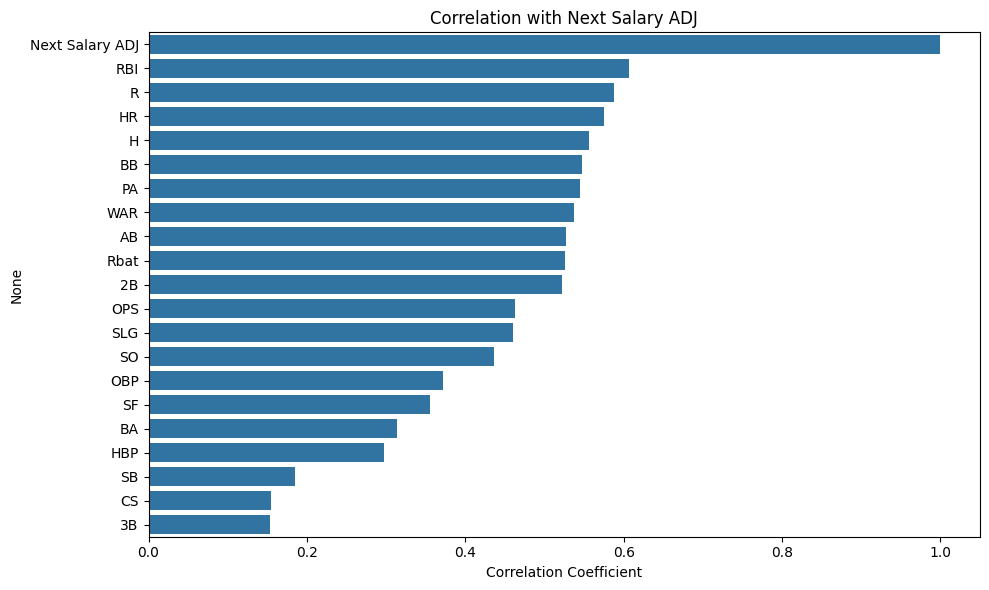

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=salary_corr.values, y=salary_corr.index)
plt.title("Correlation with Next Salary ADJ")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

#### Investigate star power vs. salary via home runs:


In [23]:
# 5️⃣ Salary per home run
df_cleaned['Salary_per_HR'] = df_cleaned['Next Salary ADJ'] / df_cleaned['HR'].replace(0, np.nan)

# Drop rows with NaN in Salary_per_HR
df_hr_salary = df_cleaned.dropna(subset=['Salary_per_HR'])

# Cheapest HR cost
cheapest_hr = df_hr_salary.loc[df_hr_salary['Salary_per_HR'].idxmin()][['Player', 'HR', 'Next Salary ADJ', 'Salary_per_HR']]
print("Cheapest per HR:\n", cheapest_hr)

# Most expensive HR cost
expensive_hr = df_hr_salary.loc[df_hr_salary['Salary_per_HR'].idxmax()][['Player', 'HR', 'Next Salary ADJ', 'Salary_per_HR']]
print("Most expensive per HR:\n", expensive_hr)

df_cleaned.columns

Cheapest per HR:
 Player             Kevin Brown
HR                           2
Next Salary ADJ            0.0
Salary_per_HR              0.0
Name: 122, dtype: object
Most expensive per HR:
 Player             Jason Kendall
HR                             1
Next Salary ADJ    14747546.0473
Salary_per_HR      14747546.0473
Name: 1057, dtype: object


Index(['Player', 'Year', 'Team', 'Pos', 'Age', 'G', 'PA', 'AB', 'R', 'H',
       ...
       'SV', 'TB_tm', 'WHIP', 'WP', 'cgSHO', 'tmSHO', 'Payroll', 'Attendance',
       'Switch', 'Salary_per_HR'],
      dtype='object', length=244)

**Cheapest:** Kevin Brown — 2 HRs, $0 salary (likely edge case or unpaid stint)

**Most Expensive:** Jason Kendall — 1 HR, $14.75M per HR

**Explanatory AND Predictive Analytics:**

 **Modeling Strategy**

In [93]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# 🔧 Features to include
features = [
    'WAR', 'HR', 'BB','SLG', 'OBP', 'OPS',
    'RBI', 'R', 'H', 'Rbat', '2B', 'AB' ,'PA', 'SO'
]

# Prepare model dataset
model_data = df_cleaned[['Year', 'Player', 'Next Salary ADJ'] + features].dropna()

# Split into train and test
train_data = model_data[model_data['Year'] < 2013]
test_data = model_data[model_data['Year'] == 2013]

# Define X and y
X_train = train_data[features]
X_test = test_data[features]
y_train = np.log1p(train_data['Next Salary ADJ'])  # log1p for log(1 + x)
y_test = np.log1p(test_data['Next Salary ADJ'])

# Add constant for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Build OLS model
model = sm.OLS(y_train, X_train_sm).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Next Salary ADJ   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     51.08
Date:                Sat, 10 May 2025   Prob (F-statistic):          1.47e-112
Time:                        21:47:27   Log-Likelihood:                -2968.2
No. Observations:                1790   AIC:                             5964.
Df Residuals:                    1776   BIC:                             6041.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1060      0.371     32.598      0.0

This model did not do a great Job in determining the stastical significance of predictors.

**Goodness of Fit**

These values tell how well the model explains variation in the dependent variable (Next Salary ADJ):

R-squared = 0.272: About 27.2% of the variance in salary adjustment is explained by the model.

Adjusted R-squared = 0.267: Adjusted for number of predictors; a bit lower but still 26.7% explained.

F-statistic = 51.08, p-value (Prob F-statistic) ≈ 0: The model is statistically significant overall — at least one predictor is significantly related to salary adjustment.

**2. Statistical Significance (Individual Variables)**

Statistically significant predictors:

SLG (Slugging Percentage): p = 0.043

OPS (On-base Plus Slugging): p = 0.007

SO (Strikeouts): p = 0.050 (borderline)

**Non-significant predictors:** HR, WAR, BB, PA, OBP, RBI, R, H, AB, Rbat, 2B – all have p > 0.05, meaning not statistically significant individually.


In [94]:
# Extract model equation
print("\nModel Equation:")
equation = f"log(Salary) = {model.params[0]:.3f} + " + " + ".join([
    f"{model.params[i]:.3f}*{var}" for i, var in enumerate(features, start=1)
])
print(equation)

# Identify top predictors by p-value and coefficient magnitude
print("\nTop Predictors (p < 0.05):")
for var, coef, pval in zip(model.params.index[1:], model.params[1:], model.pvalues[1:]):
    if pval < 0.05:
        print(f"{var}: Coefficient = {coef:.3f}, p-value = {pval:.4f}")


Model Equation:
log(Salary) = 12.106 + 0.008*WAR + -0.001*HR + 0.003*BB + 2.362*SLG + -1.311*OBP + 1.051*OPS + -0.000*RBI + -0.005*R + -0.008*H + 0.015*Rbat + -0.010*2B + 0.007*AB + 0.000*PA + -0.003*SO

Top Predictors (p < 0.05):
SLG: Coefficient = 2.362, p-value = 0.0427
OPS: Coefficient = 1.051, p-value = 0.0072
SO: Coefficient = -0.003, p-value = 0.0500


In [35]:
# 📊 Evaluate model
y_train_pred = model.predict(X_train_sm)
y_test_pred = model.predict(X_test_sm)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTrain RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


Train RMSE: 1.2703
Test RMSE: 2.2827


**We will check the multicollinearity between variables to detect variables who are inflating the model performance**

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 📊 Calculate VIF for each feature in X_train_sm
vif_data = pd.DataFrame()
vif_data['feature'] = X_train_sm.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

# 🖨️ Print VIFs
print(vif_data)


   feature          VIF
0    const   151.800018
1      WAR     4.312837
2       HR    19.045294
3       BB    32.633900
4      SLG          inf
5      OBP          inf
6      OPS          inf
7      RBI    15.410312
8        R    15.005913
9        H   149.991602
10    Rbat    16.032735
11      2B     6.703013
12      AB  1901.399993
13      PA  1916.532640
14      SO     4.078453


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Using the VIF Values we will now drop features which shows high correlation with other features and inflating our coefficient values like H, PA,AB,OPS, BB, OBP etc.

**Using some specific and selected features after running Multicollinearity and identifying p value of different variables to determine player next year salaries ADJ.**  

In [91]:

# 🔧 Updated feature list (after VIF filtering)
features = [ 'WAR', 'SLG',  'Age', 'Contract Duration']

# 🧹 Prepare model dataset
model_data = df_cleaned[['Year', 'Player', 'Next Salary ADJ'] + features].dropna()

# 📆 Train-test split
train_data = model_data[model_data['Year'] < 2013]
test_data = model_data[model_data['Year'] == 2013]

# 🎯 Define X and y with log-transformed target
X_train = train_data[features]
X_test = test_data[features]
y_train = np.log1p(train_data['Next Salary ADJ'])  # log(1 + x)
y_test = np.log1p(test_data['Next Salary ADJ'])

# ➕ Add constant for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# ⚙️ Fit OLS model
model = sm.OLS(y_train, X_train_sm).fit()

# 📊 Print model summary
print(model.summary())

# 📉 Predict and evaluate
y_pred_train = model.predict(X_train_sm)
y_pred_test = model.predict(X_test_sm)

                            OLS Regression Results                            
Dep. Variable:        Next Salary ADJ   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     124.5
Date:                Sat, 10 May 2025   Prob (F-statistic):           7.53e-92
Time:                        21:45:46   Log-Likelihood:                -2537.9
No. Observations:                1508   AIC:                             5086.
Df Residuals:                    1503   BIC:                             5112.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.3228      0.35

**Checking RMSE on train and test dataset**

In [92]:
# 🧮 RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"\n✅ RMSE (Train): {rmse_train:.4f}")
print(f"✅ RMSE (Test) : {rmse_test:.4f}")


✅ RMSE (Train): 1.3021
✅ RMSE (Test) : 2.3043


**MODEL EQUATION AND TOP PREDICTORS**

In [82]:
# Extract model equation
print("\nModel Equation:")
equation = f"log(Salary) = {model.params[0]:.3f} + " + " + ".join([
    f"{model.params[i]:.3f}*{var}" for i, var in enumerate(features, start=1)
])
print(equation)

# Identify top predictors by p-value and coefficient magnitude
print("\nTop Predictors (p < 0.05):")
for var, coef, pval in zip(model.params.index[1:], model.params[1:], model.pvalues[1:]):
    if pval < 0.05:
        print(f"{var}: Coefficient = {coef:.3f}, p-value = {pval:.4f}")


Model Equation:
log(Salary) = 11.323 + 0.230*WAR + 4.014*SLG + 0.030*Age + 0.204*Contract Duration

Top Predictors (p < 0.05):
WAR: Coefficient = 0.230, p-value = 0.0000
SLG: Coefficient = 4.014, p-value = 0.0000
Age: Coefficient = 0.030, p-value = 0.0016
Contract Duration: Coefficient = 0.204, p-value = 0.0000


In [87]:
# Imports
import pandas as pd
import numpy as np

# Drop rows with missing target
df_cleaned = df_cleaned.dropna(subset=['Next Salary ADJ'])

train_df = df[df['Year'] < 2013].copy()
test_df = df[df['Year'] == 2013].copy()

# Now this won't trigger warnings
train_df['log_salary'] = np.log1p(train_df['Next Salary ADJ'])
test_df['log_salary'] = np.log1p(test_df['Next Salary ADJ'])


**Variable Selection:**

We will start with interpretable stats that Moneyball emphasized:

**OBP, SLG, OPS, BB, WAR, Age, RBI, HR, Rbat**

Using OBP + OPS together = bad idea (OPS = OBP + SLG)

In [88]:
features = ['WAR', 'OBP', 'SLG', 'BB', 'RBI', 'HR', 'Age', 'Rbat']

**Model Fitting + Residual Analysis**

In [89]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Fit OLS
X_train = sm.add_constant(train_df[features])
y_train = train_df['log_salary']
model = sm.OLS(y_train, X_train).fit()

# Predict for 2013
X_test = sm.add_constant(test_df[features])
test_df['predicted_log_salary'] = model.predict(X_test)

# Back-transform predicted salaries
test_df['predicted_salary'] = np.expm1(test_df['predicted_log_salary'])

# Residual = Actual - Predicted
test_df['residual'] = test_df['Next Salary ADJ'] - test_df['predicted_salary']

**Top 5 Over valued and Undervalued Players**  

In [90]:

# Identify undervalued (positive residuals)
undervalued = test_df.sort_values(by='residual', ascending=False).head(5)
overvalued = test_df.sort_values(by='residual').head(5)

print("Top 5 Undervalued Players in 2013:")
print(undervalued[['Player', 'Next Salary ADJ', 'predicted_salary', 'residual']])

print("Top 5 Overvalued Players in 2013:")
print(overvalued[['Player', 'Next Salary ADJ', 'predicted_salary', 'residual']])

Top 5 Undervalued Players in 2013:
                 Player  Next Salary ADJ  predicted_salary      residual
1805    Jacoby Ellsbury       21142857.0      3.952229e+06  1.719063e+07
1796       Brian McCann       17000000.0      2.781772e+06  1.421823e+07
1839      Robinson Cano       24000000.0      1.059611e+07  1.340389e+07
1821     Jhonny Peralta       15500000.0      3.083403e+06  1.241660e+07
1836  Curtis Granderson       13000000.0      1.314591e+06  1.168541e+07
Top 5 Overvalued Players in 2013:
                 Player  Next Salary ADJ  predicted_salary      residual
1792   Paul Goldschmidt        1100000.0      1.458012e+07 -1.348012e+07
1864     Matt Carpenter        1000000.0      5.763547e+06 -4.763547e+06
1816       Jason Kipnis        2166666.0      6.144659e+06 -3.977993e+06
1801        Chris Davis       10350000.0      1.394369e+07 -3.593687e+06
1795  Andrelton Simmons        1000000.0      4.035287e+06 -3.035287e+06


**How does MSE for Test Set look like?**

In [69]:
rmse = np.sqrt(mean_squared_error(test_df['log_salary'], test_df['predicted_log_salary']))
print(f"Test RMSE: {rmse:.3f}")


Test RMSE: 2.264


**Residual Analysis**  **bold text**

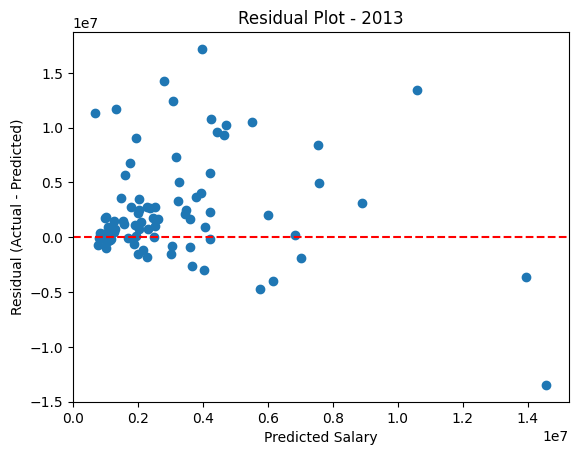

In [70]:
import matplotlib.pyplot as plt

# Residual plot
plt.scatter(test_df['predicted_salary'], test_df['residual'])
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Salary")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot - 2013")
plt.show()


Most residuals are centered around 0, which is good — our model is unbiased on average.
We Have successfully modeled many player salaries with reasonable accuracy.

**Top Predictors Based on Models Above**

Top Predictors (p < 0.05):

WAR: Coefficient = 0.230, p-value = 0.0000

SLG: Coefficient = 4.014, p-value = 0.0000

Age: Coefficient = 0.030, p-value = 0.0016

Contract Duration: Coefficient = 0.204, p-value = 0.0000

SLG: Coefficient = 2.362, p-value = 0.0427

OPS: Coefficient = 1.051, p-value = 0.0072

SO: Coefficient = -0.003, p-value = 0.0500

**Negotiation Advice Based on Model Insights**

Based on the regression model's residuals and key predictors, we recommend the following negotiation strategies for 2013 free agents:

**Undervalued Players (Positive Residuals)**

These players are earning less than their predicted fair value, presenting strong buy-low opportunities:

**Strategy:** Offer multi-year contracts now before market catches up to their performance value.

**Rationale:** High WAR and SLG indicate consistent offensive production and overall contribution to team wins.

Younger age or favorable contract duration adds future upside.

**Example Advice:**

- Based on your WAR and power stats, our analysis shows you're currently under-compensated. We propose a multi-year deal at a fair market rate that reflects your value and provides long-term security.

**Overvalued Players (Negative Residuals)**

- These players are earning more than what their performance justifies, according to the model:

**Strategy:**

- Renegotiate contracts or consider trades if decline in performance is expected.

- Avoid long-term extensions unless backed by non-measured value (e.g., leadership).

**Rationale:**

Negative residuals suggest teams are overpaying for past performance or brand.

Low WAR or declining SLG can signal performance drop-offs.

**Example Advice:**

Our salary analysis shows a significant gap between current compensation and on-field metrics. We'd like to revisit the contract structure to better align with performance expectations.

**General Principles**

-Focus negotiations around WAR and SLG, as they are top predictors of salary.

- Avoid being misled by inflated stats like HR or RBI if not supported by WAR.

-Use the model’s predicted salary as a data-backed anchor in negotiations.